##### Sounder Based Derived Surface Skin Temperature
##### location="/data/ldm/pub/native/satellite/SFC-T/SUPER-NATIONAL_1km/" >


In [2]:
# Imports
from urllib.request import urlopen

from metpy.io.gini import GiniFile
from siphon.catalog import TDSCatalog

cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/satellite/SFC-T/SUPER-NATIONAL_1km/current/catalog.xml')

In [4]:
dataset_name = sorted(cat.datasets.keys())

In [5]:
dataset_name

['SUPER-NATIONAL_1km_SFC-T_20170409_2100.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170409_2200.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170409_2300.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0000.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0100.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0200.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0300.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0400.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0500.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0600.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0700.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0800.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_0900.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1000.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1100.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1200.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1300.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1400.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1500.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1600.gini',
 'SUPER-NATIONAL_1km_SFC-T_20170410_1700

In [2]:
dataset_name = sorted(cat.datasets.keys())[-1]
dataset = cat.datasets[dataset_name]

# Open the GINI file using MetPy and grab as a NetCDF-like Dataset object
remote_gini_file = urlopen(dataset.access_urls['HTTPServer'])
gini = GiniFile(remote_gini_file)
gini_ds = gini.to_dataset()

Adjusting bad PDB size from 0 to 512.


In [3]:
print(gini_ds)

root

Dimensions:
<class 'metpy.io.cdm.Dimension'>: name = time, size = 1
<class 'metpy.io.cdm.Dimension'>: name = x, size = 1536
<class 'metpy.io.cdm.Dimension'>: name = y, size = 1008

Variables:
<class 'metpy.io.cdm.Variable'>: int32 time(time)
	units: milliseconds since 2017-04-12T00:00:00
	shape = 1
<class 'metpy.io.cdm.Variable'>: int32 Polar_Stereographic()
	grid_mapping_name: polar_stereographic
	straight_vertical_longitude_from_pole: -105.0
	latitude_of_projection_origin: 90
	earth_radius: 6371200.0
	standard_parallel: 60.0
<class 'metpy.io.cdm.Variable'>: float64 x(x)
	units: m
	long_name: x coordinate of projection
	standard_name: projection_x_coordinate
	shape = 1536
<class 'metpy.io.cdm.Variable'>: float64 y(y)
	units: m
	long_name: y coordinate of projection
	standard_name: projection_y_coordinate
	shape = 1008
<class 'metpy.io.cdm.Variable'>: float64 lon(y, x)
	long_name: longitude
	units: degrees_east
	shape = (1008, 1536)
<class 'metpy.io.cdm.Variable'>: float64 lat(y,

In [4]:
list(gini_ds.variables.keys())

['time', 'Polar_Stereographic', 'x', 'y', 'lon', 'lat', 'Surface Skin Temp']

In [5]:
# Pull parts out of the data file
data_var = gini_ds.variables['Surface Skin Temp']
x = gini_ds.variables['x'][:]
y = gini_ds.variables['y'][:]
lon = gini_ds.variables['lon'][:]
lat = gini_ds.variables['lat'][:]
time_var = gini_ds.variables['time']
proj_var = gini_ds.variables[data_var.grid_mapping]
print(proj_var)

<class 'metpy.io.cdm.Variable'>: int32 Polar_Stereographic()
	grid_mapping_name: polar_stereographic
	straight_vertical_longitude_from_pole: -105.0
	latitude_of_projection_origin: 90
	earth_radius: 6371200.0
	standard_parallel: 60.0


In [6]:
import cartopy.crs as ccrs

# Create a Globe specifying a spherical earth with the correct radius
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=proj_var.earth_radius,
                   semiminor_axis=proj_var.earth_radius)

In [7]:
proj = ccrs.Stereographic(central_longitude=proj_var.straight_vertical_longitude_from_pole,
                             central_latitude=proj_var.latitude_of_projection_origin,
                             globe=globe)
#expected = ('+ellps=WGS84 +proj=stere +lat_0=0.0 '
#                    '+lon_0=0.0 +x_0=0.0 +y_0=0.0 +no_defs')
    
print(proj.proj4_init)
#LambertConformal(central_longitude=proj_var.longitude_of_central_meridian,
#                             central_latitude=proj_var.latitude_of_projection_origin,
#                             standard_parallels=[proj_var.standard_parallel],
#                             globe=globe)

+ellps=sphere +a=6371200.0 +b=6371200.0 +proj=stere +lat_0=90 +lon_0=-105.0 +x_0=0.0 +y_0=0.0 +no_defs


In [8]:
#plt.figure(figsize=(3, 3))
#ax = plt.axes(projection=ccrs.Stereographic())
#ax.coastlines(resolution='110m')
#ax.gridlines()

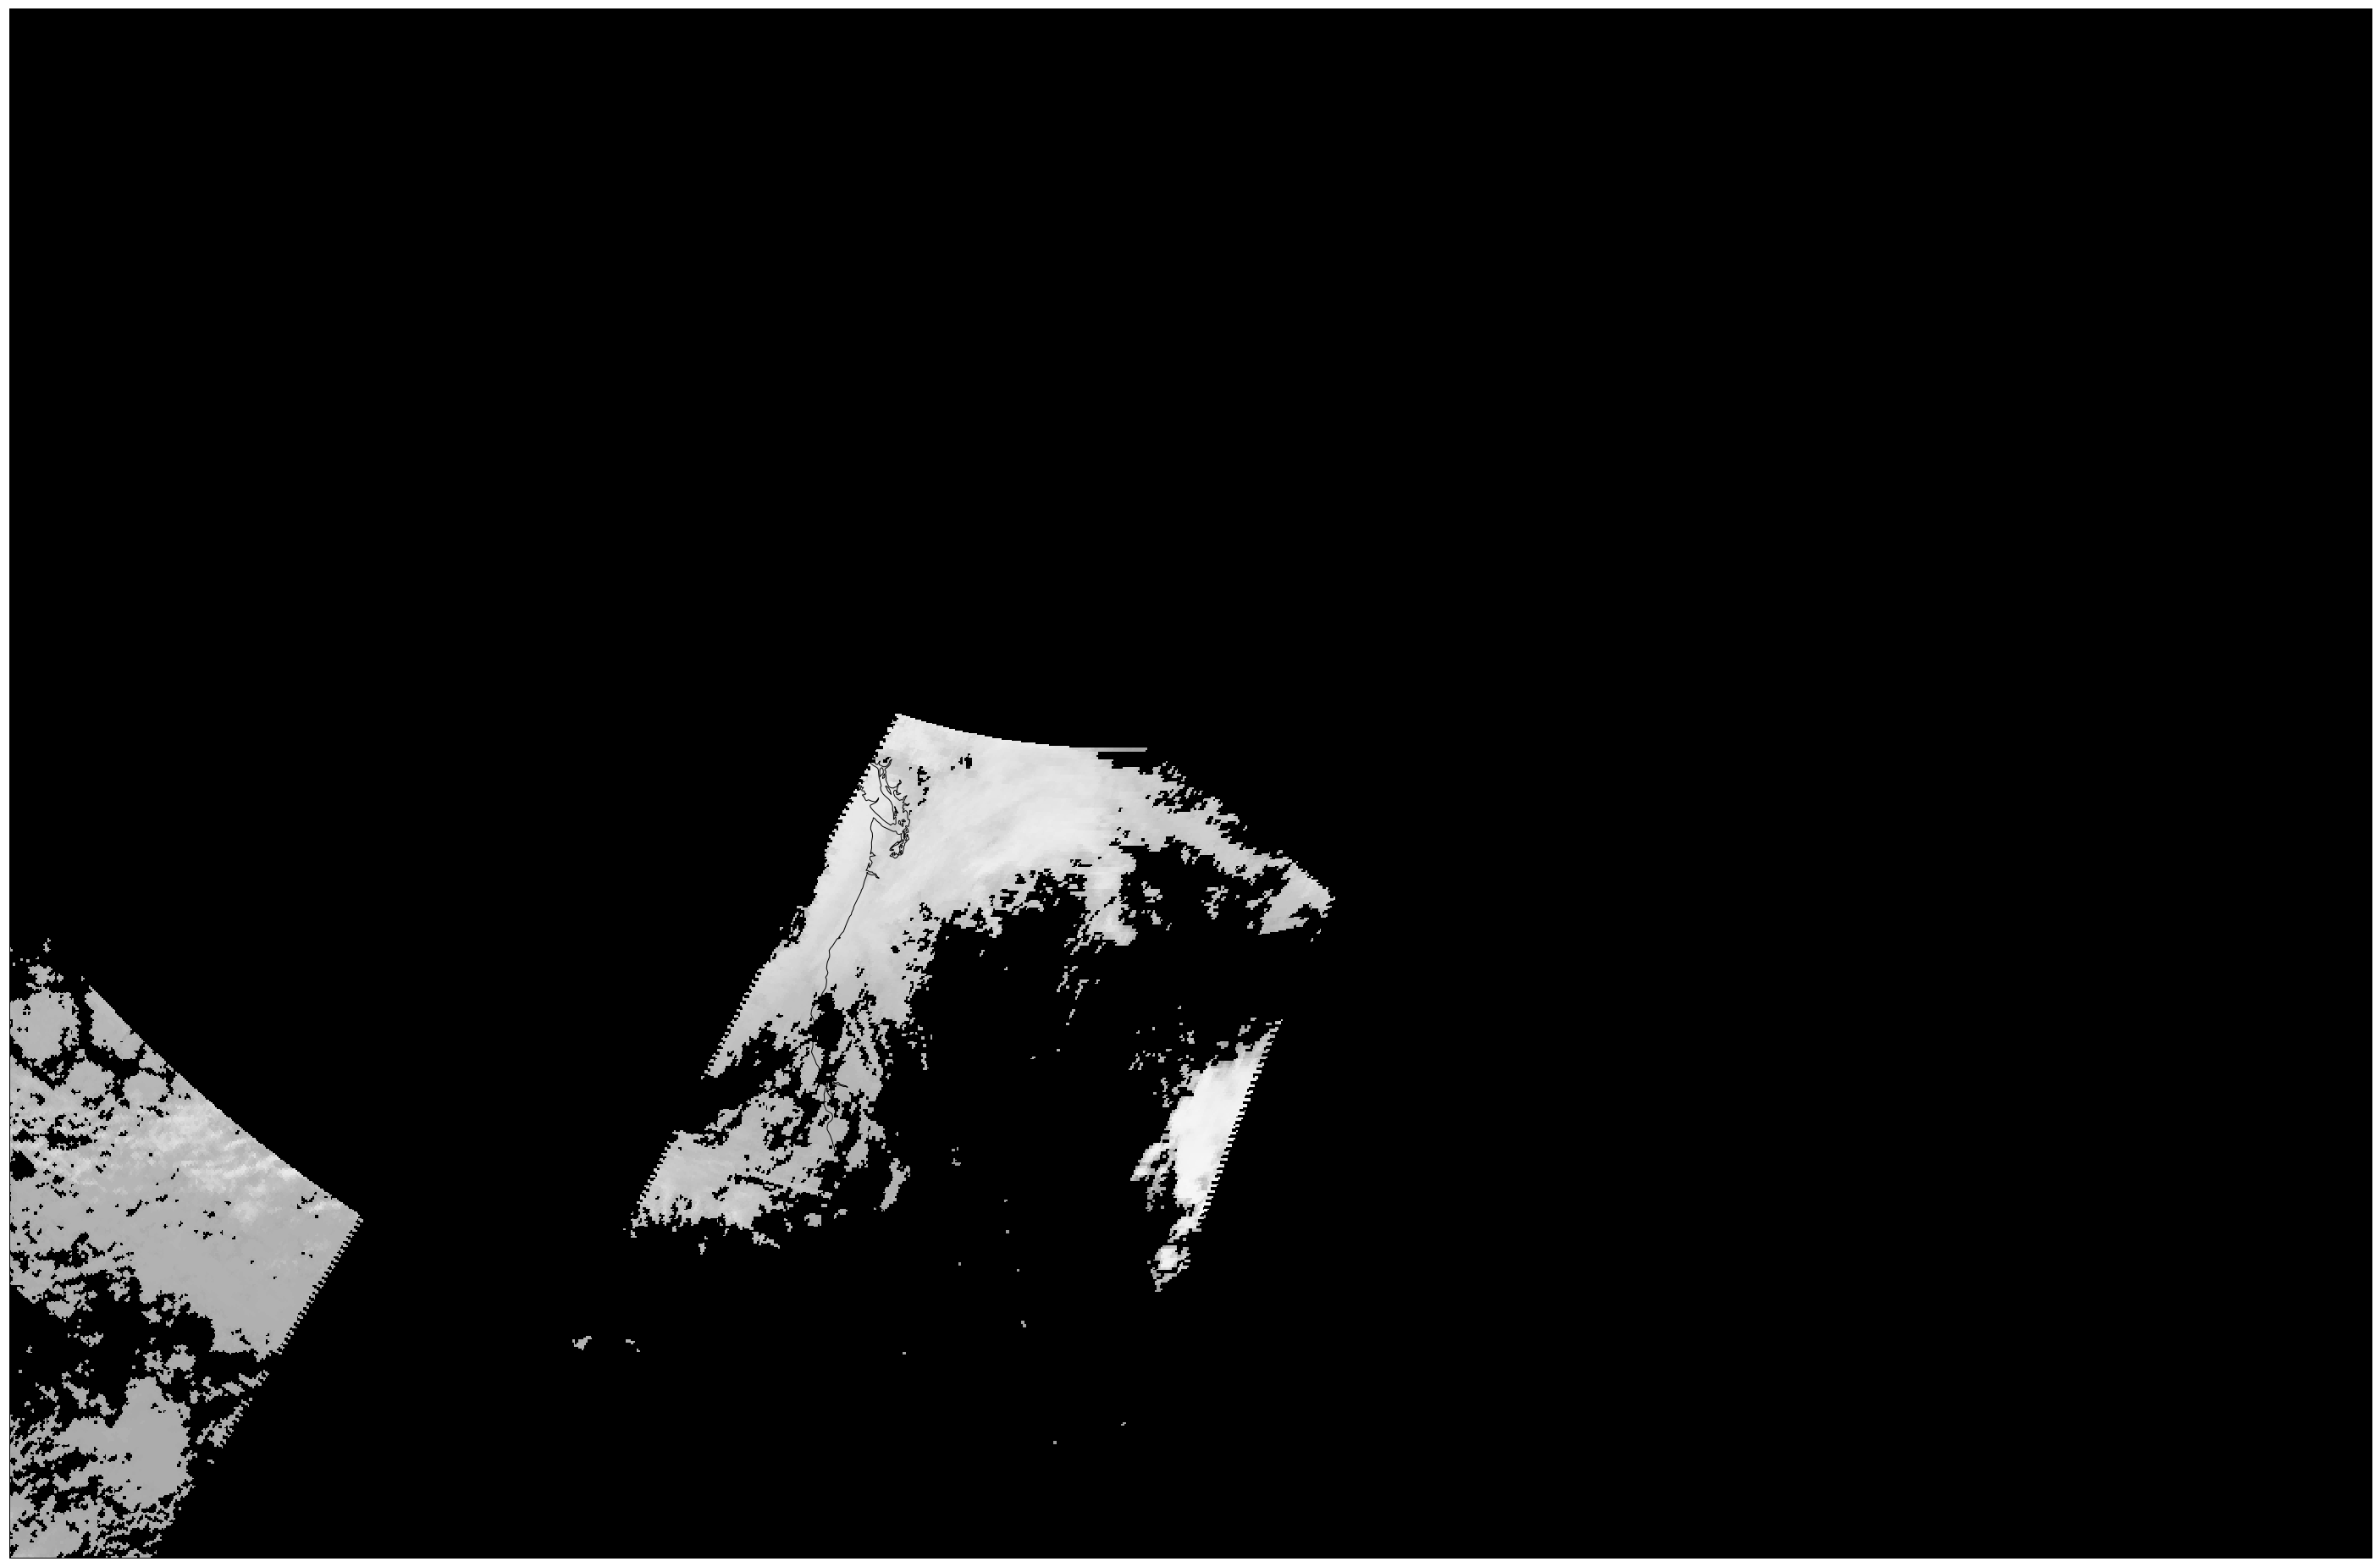

In [9]:
# Make sure the notebook puts figures inline
%matplotlib inline
import matplotlib.pyplot as plt

# Create a new figure with size 10" by 10"
fig = plt.figure(figsize=(50, 50))

# Put a single axes on this figure; set the projection for the axes to be our
# Lambert conformal projection
ax = fig.add_subplot(1, 1, 1, projection=proj)


# Plot the data using a simple greyscale colormap (with black for low values);
# set the colormap to extend over a range of values from 140 to 255.
# Note, we save the image returned by imshow for later...
im = ax.imshow(data_var[:], extent=(x[0], x[-1], y[0], y[-1]), origin='upper',
               cmap='Greys_r', norm=plt.Normalize(140, 255))

# Add high-resolution coastlines to the plot
ax.coastlines(resolution='50m', color='black')

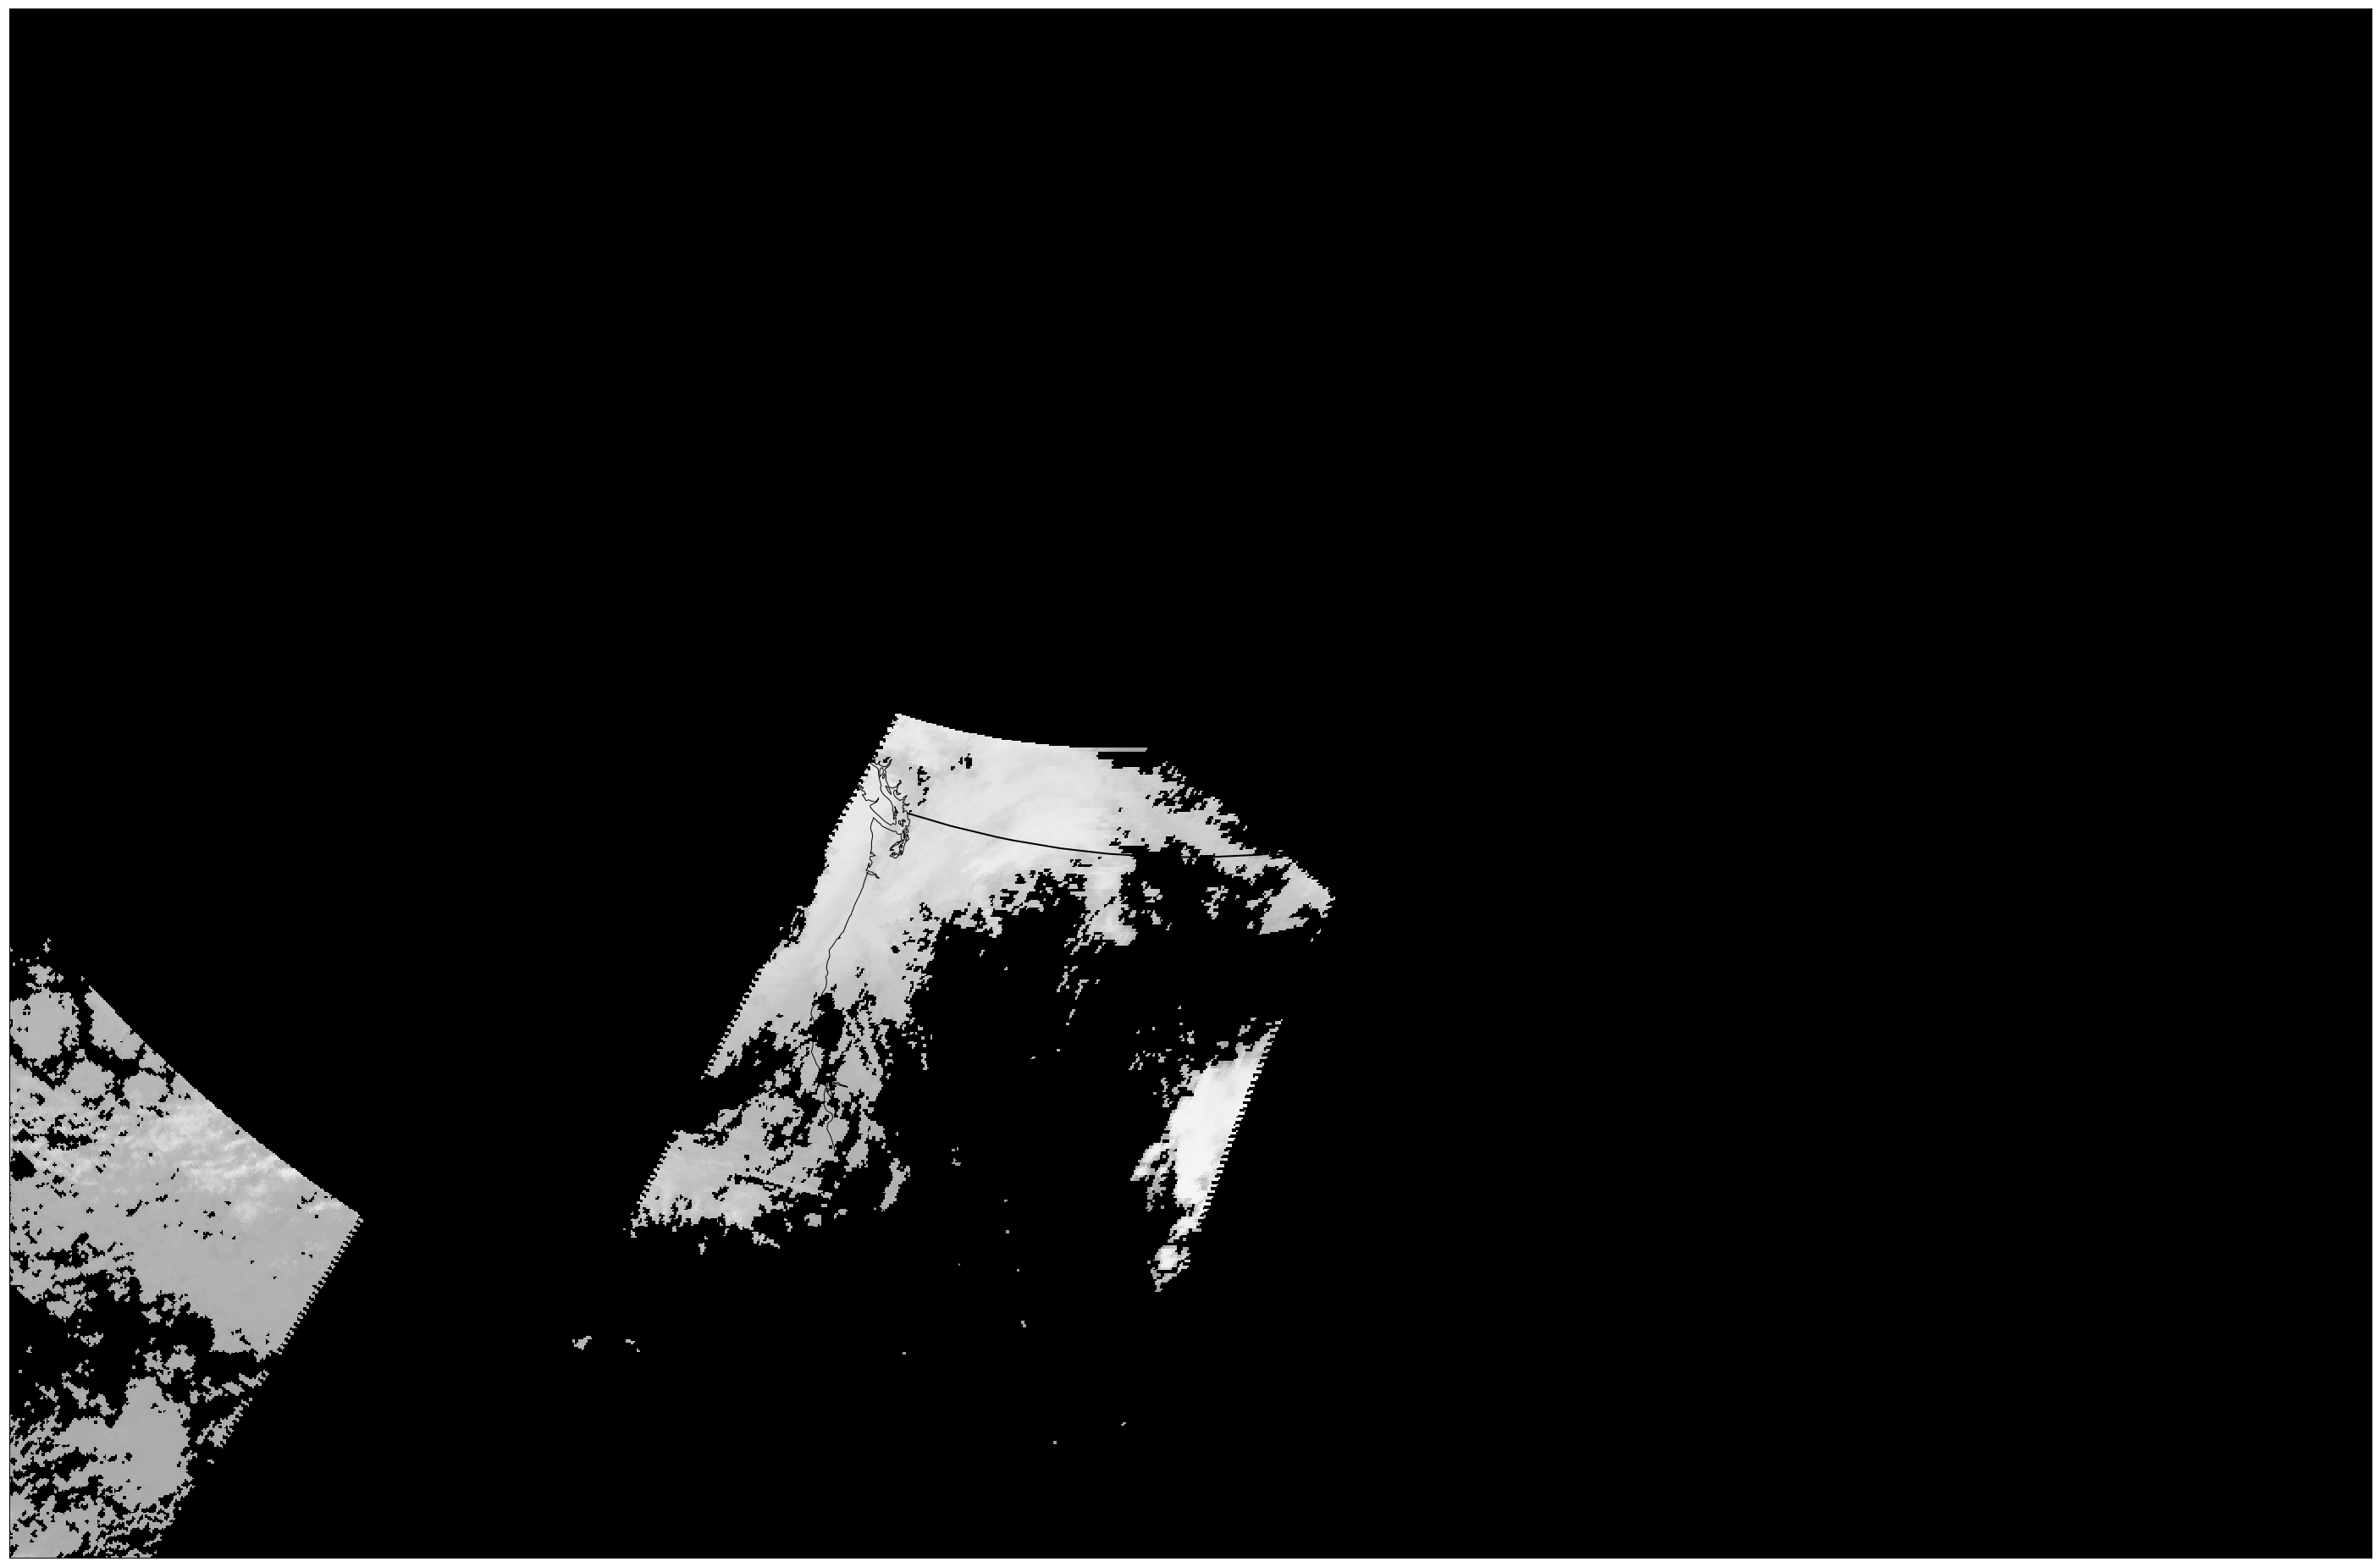

In [10]:
import cartopy.feature as cfeat

# Add country borders with a thick line.
ax.add_feature(cfeat.BORDERS, linewidth='2', edgecolor='black')

# Set up a feature for the state/province lines. Tell cartopy not to fill in the polygons
state_boundaries = cfeat.NaturalEarthFeature(category='cultural',
                                             name='admin_1_states_provinces_lines',
                                             scale='50m', facecolor='none')

# Add the feature with dotted lines, denoted by ':'
ax.add_feature(state_boundaries, linestyle=':')

# Redisplay modified figure
fig

In [11]:
from metpy.plots.ctables import registry
wv_norm, wv_cmap = registry.get_with_steps('WVCIMSS', 0, 1)

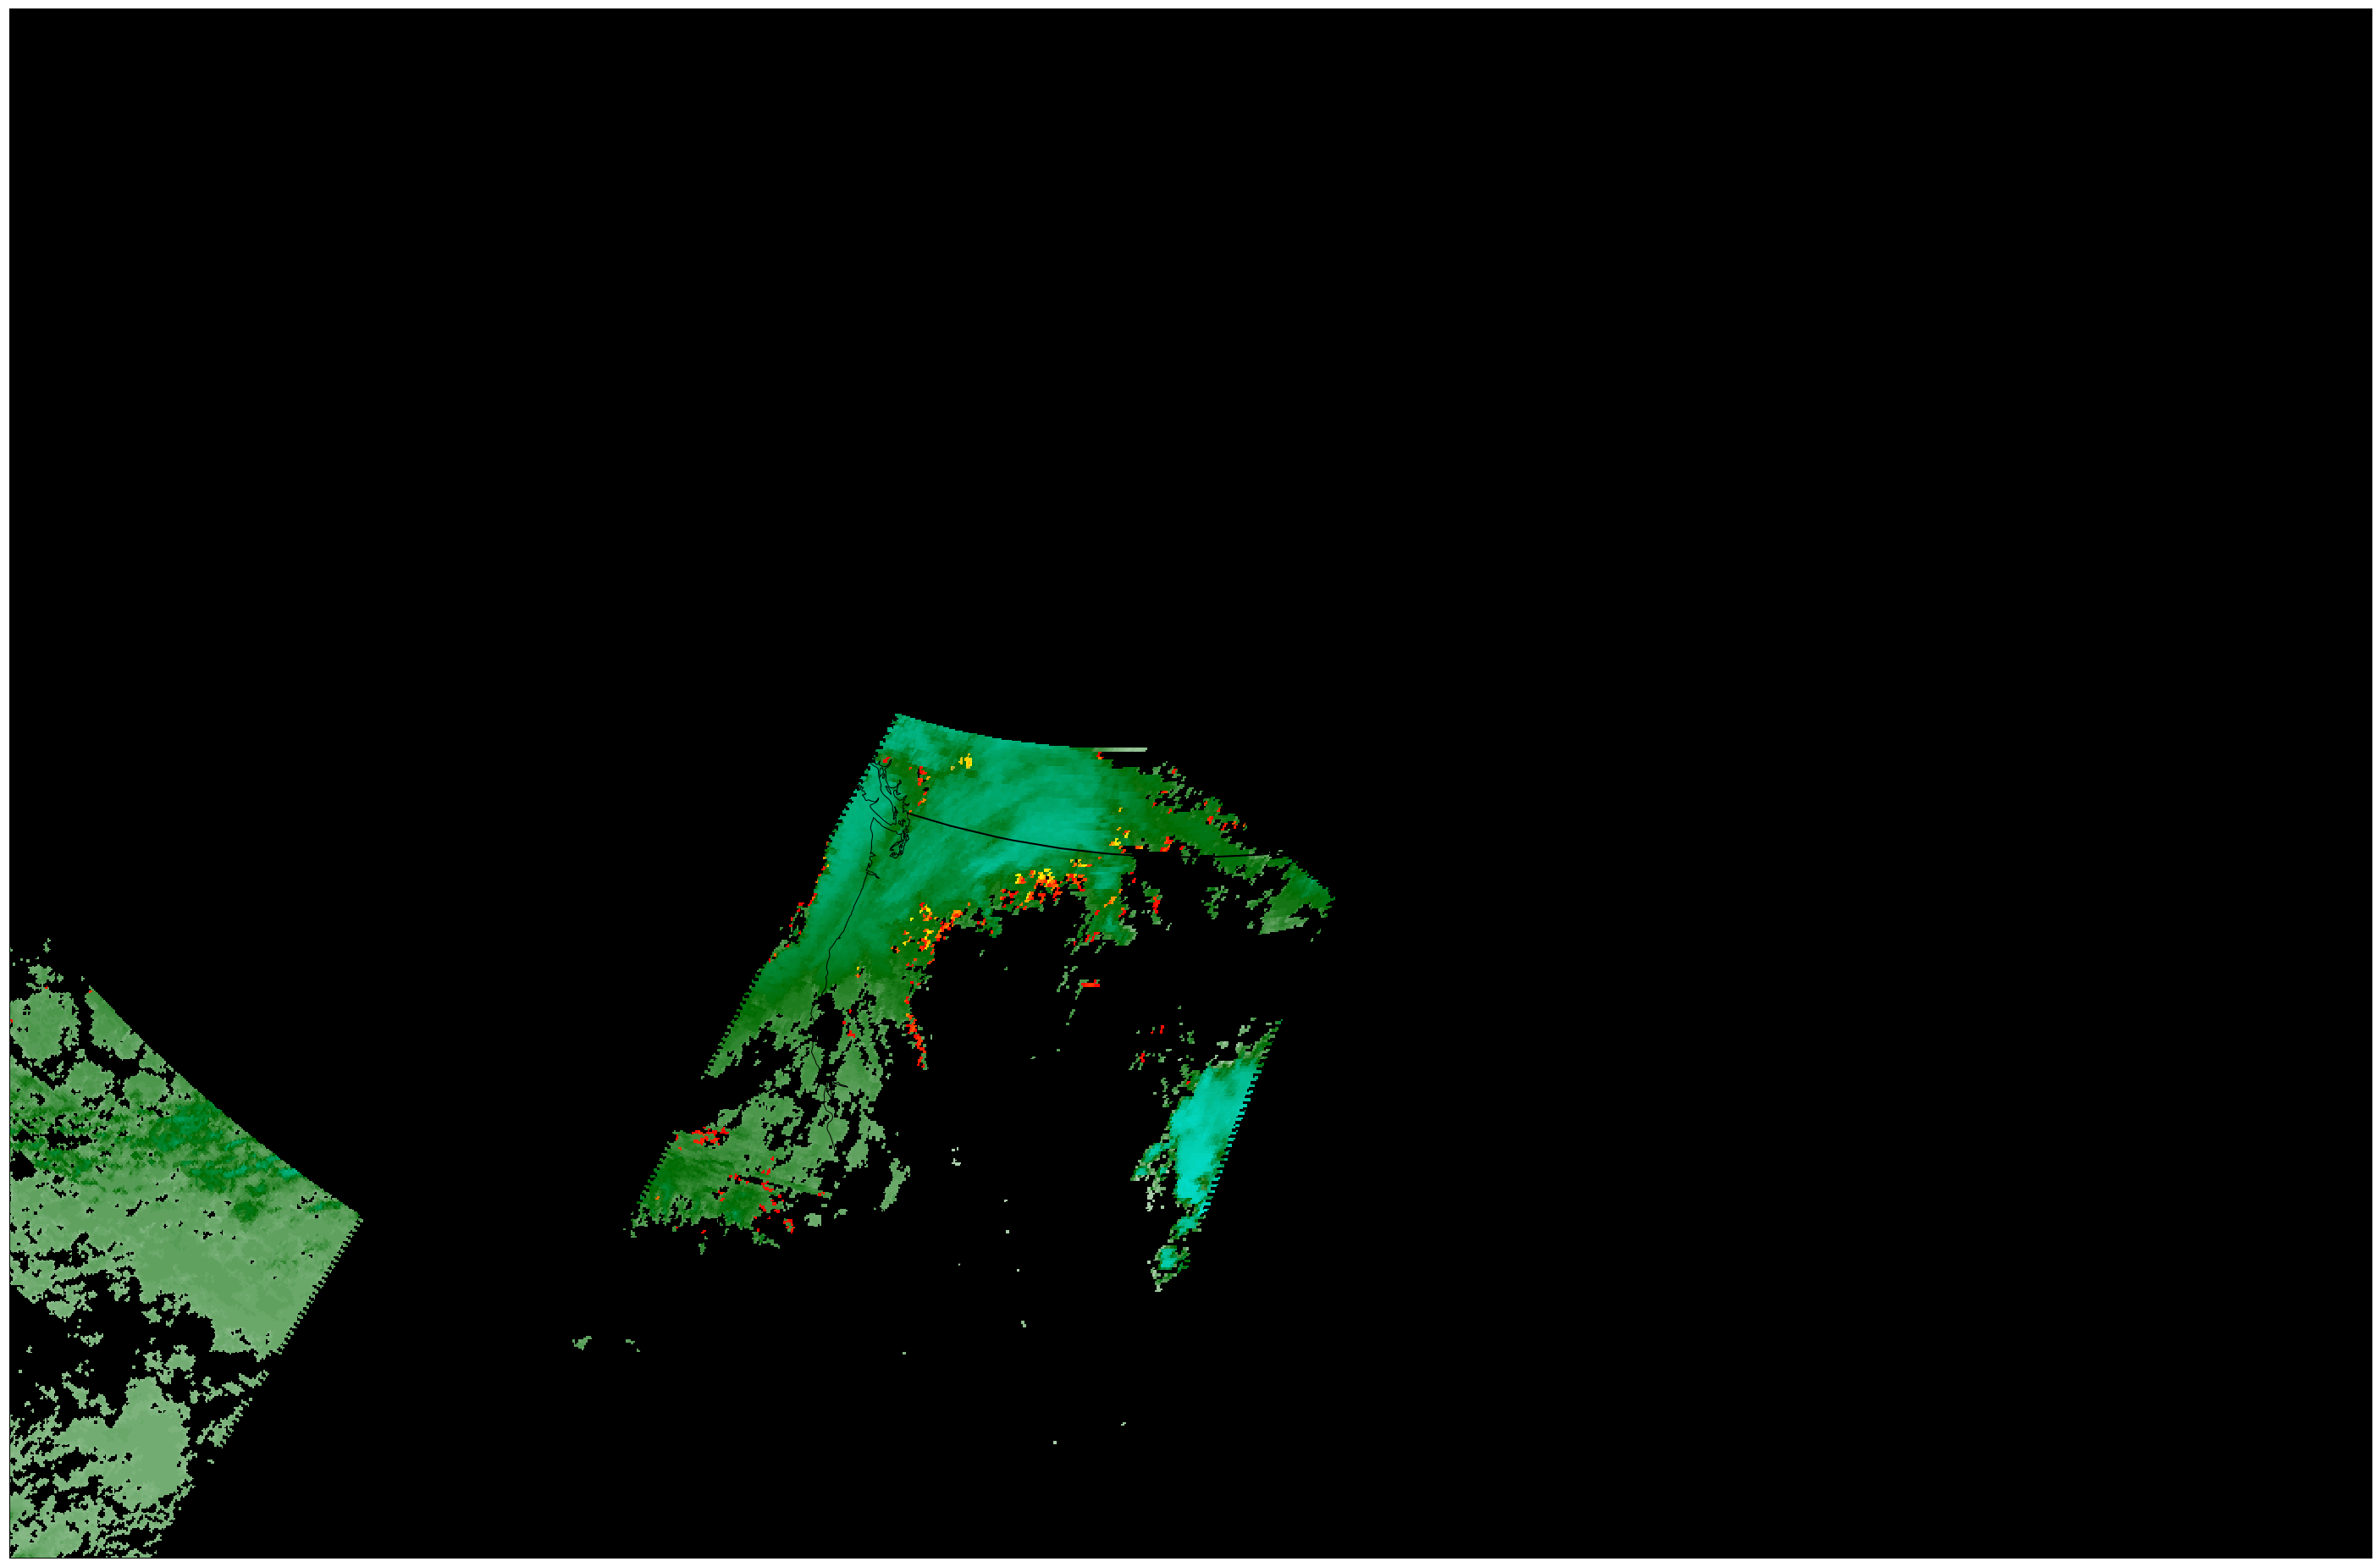

In [12]:
im.set_cmap(wv_cmap)
im.set_norm(wv_norm)
fig

In [13]:
time_var = gini_ds.variables['time']
print(time_var)

<class 'metpy.io.cdm.Variable'>: int32 time(time)
	units: milliseconds since 2017-04-12T00:00:00
	shape = 1


In [14]:
from netCDF4 import num2date
timestamp = num2date(time_var[:].squeeze(), time_var.units)
timestamp

datetime.datetime(2017, 4, 12, 20, 0)

In [15]:
print(x[0], x[-1], y[0], y[-1])

-6096003.96613 6101873.53387 -8381997.26805 -379871.76805


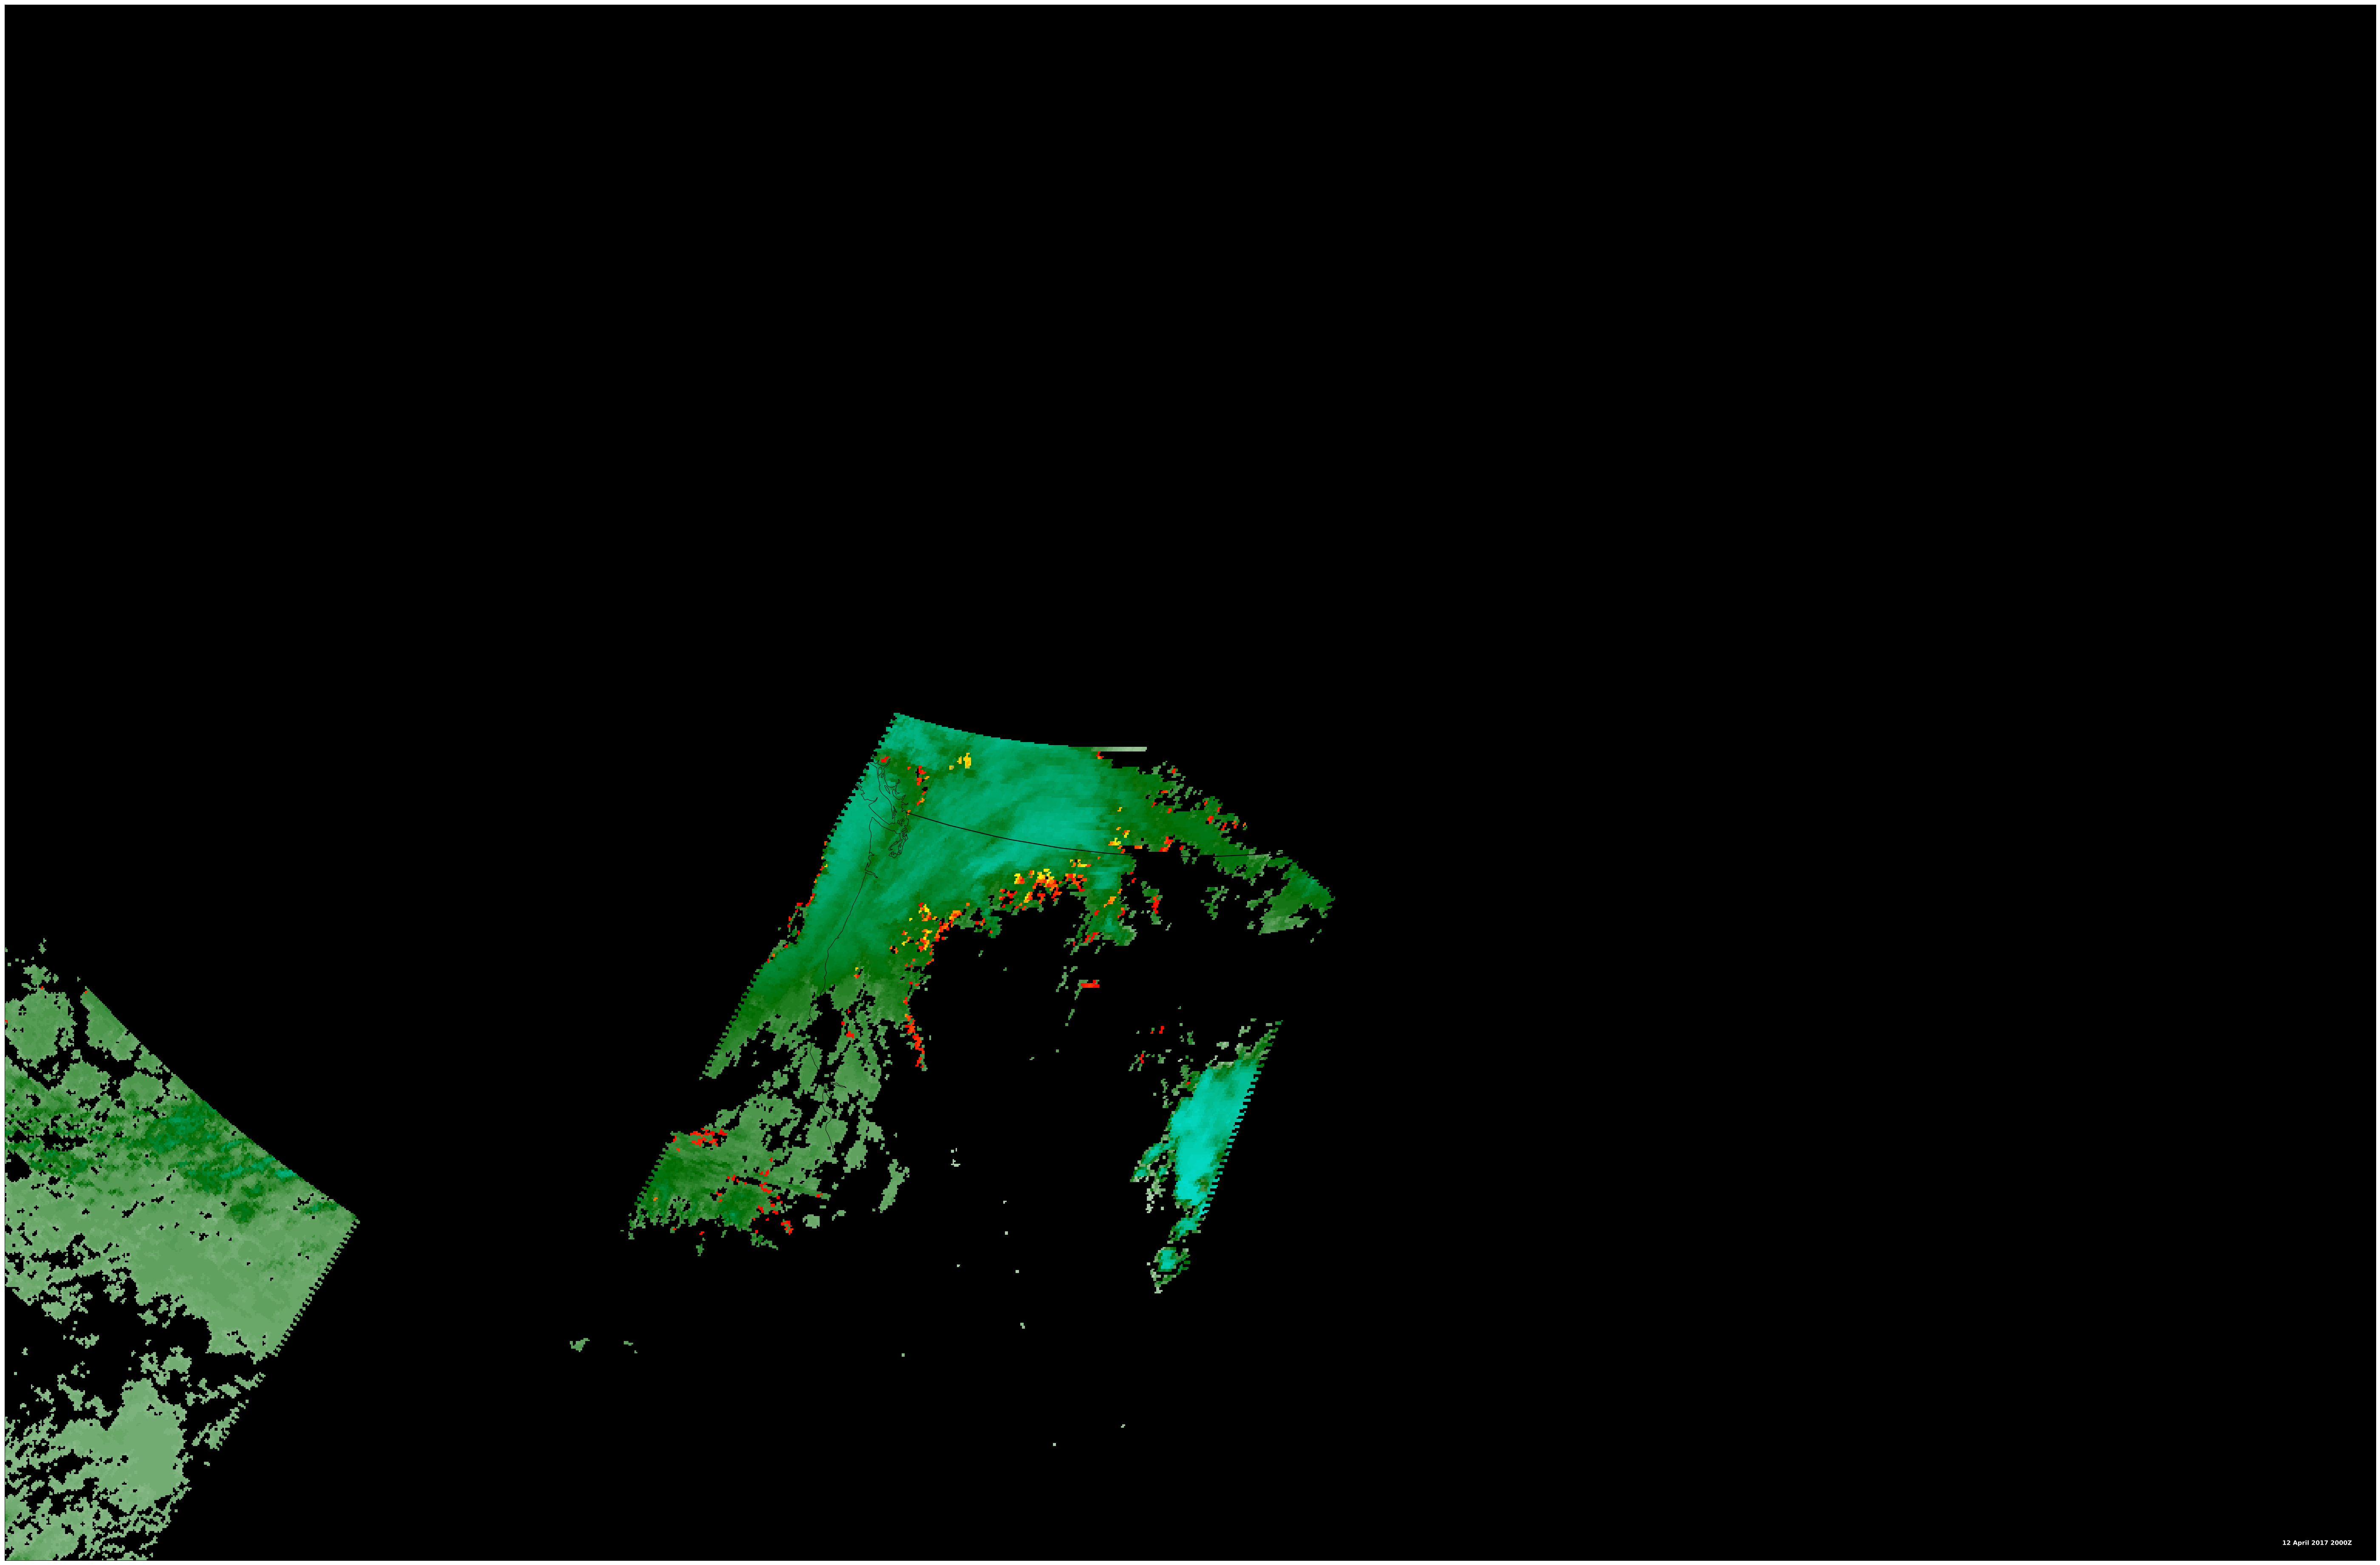

In [16]:
# Same as before, except we call imshow with our colormap and norm.
fig = plt.figure(figsize=(100, 100))
ax = fig.add_subplot(1, 1, 1, projection=proj)

im = ax.imshow(data_var[:], extent=(x[0], x[-1], y[0], y[-1]), origin='upper',
               cmap=wv_cmap, norm=wv_norm)
ax.coastlines(resolution='50m', color='black')
ax.add_feature(state_boundaries, linestyle=':')
ax.add_feature(cfeat.BORDERS, linewidth='2', edgecolor='black')

# Add text (aligned to the right); save the returned object so we can manipulate it.
text = ax.text(0.99, 0.01, timestamp.strftime('%d %B %Y %H%MZ'),
               horizontalalignment='right', transform=ax.transAxes,
               color='white', fontsize='x-large', weight='bold')

# Make the text stand out even better using matplotlib's path effects
from matplotlib import patheffects
text.set_path_effects([patheffects.Stroke(linewidth=2, foreground='black'),
                       patheffects.Normal()])

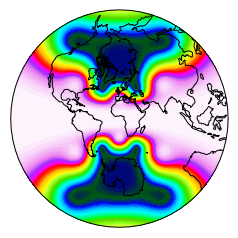

In [17]:
#Sample about stereo projection

#import cartopy.crs as ccrs
#import matplotlib.pyplot as plt

#from cartopy.examples.waves import sample_data

#ax = plt.axes(projection=ccrs.Stereographic())

#x, y, z = sample_data((100, 200))
#cs = ax.contourf(x, y, z, 100,
#                 transform=ccrs.PlateCarree(),
#                 cmap='gist_ncar')
#ax.coastlines()

# without the set_global, currently, the plot is tiny because the limits
# are being erroneously being set (opened issue for that)
#ax.set_global()

#plt.show()

/home/ajijohn/miniconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


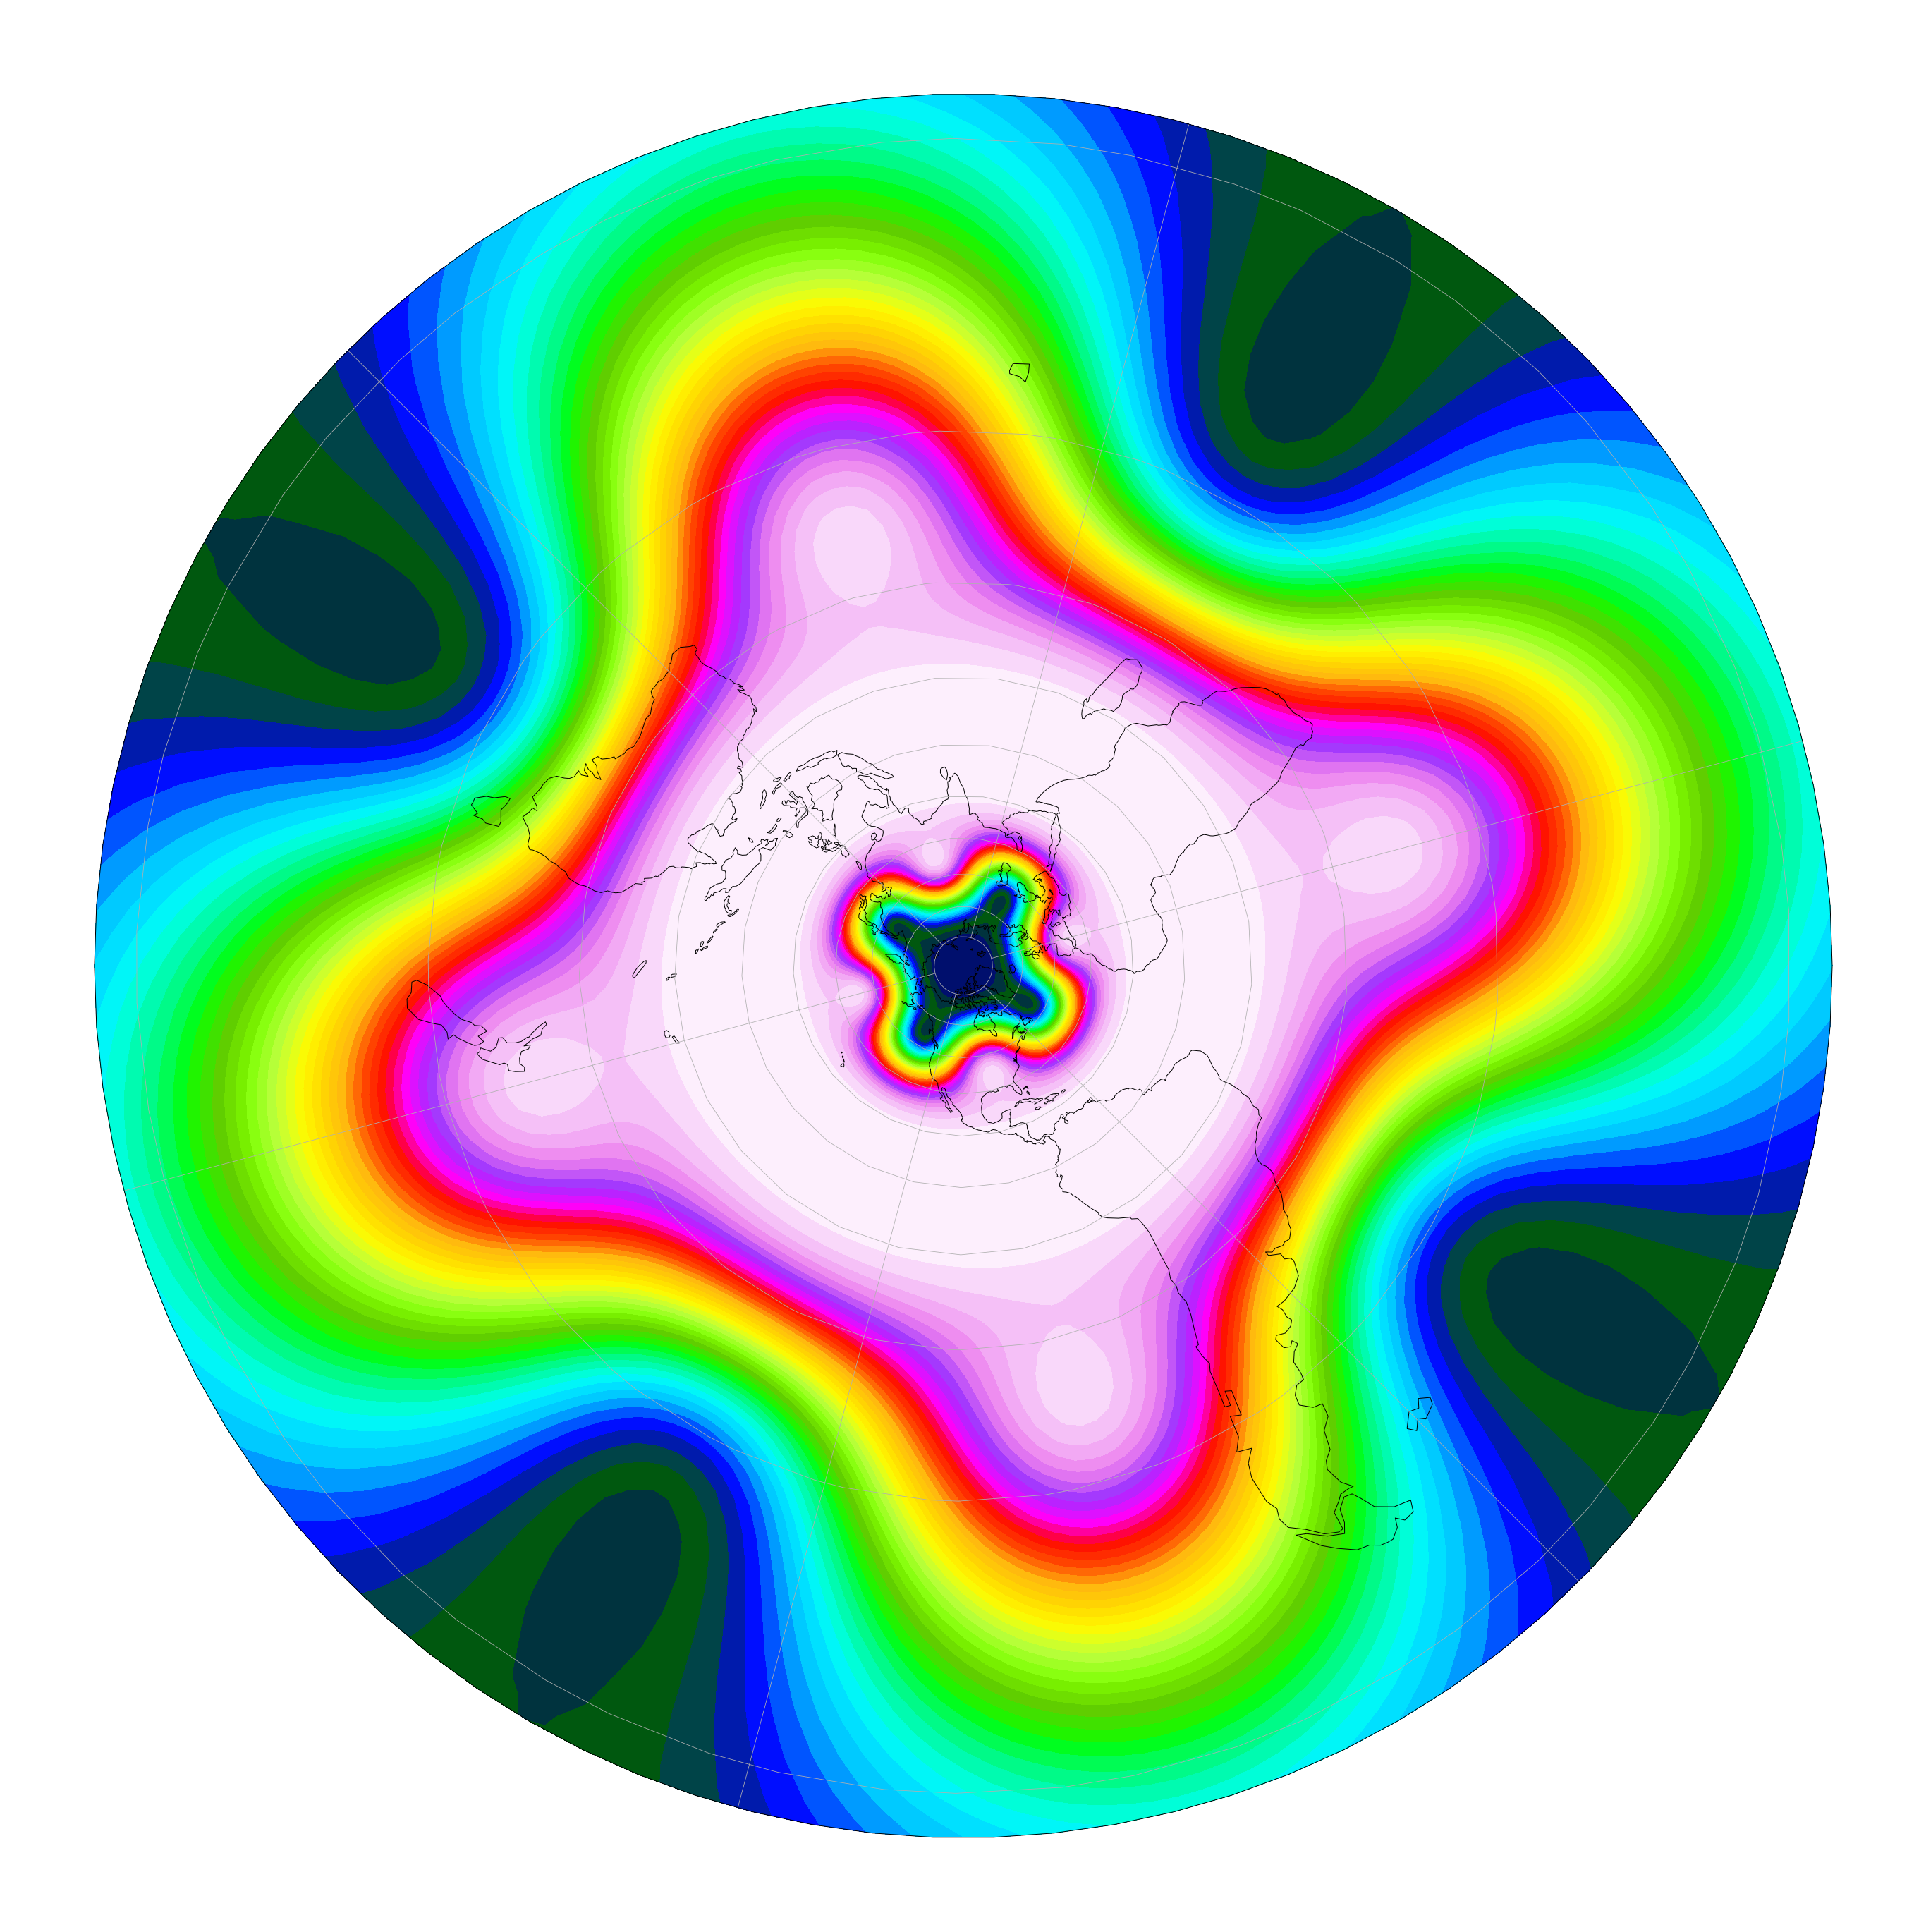

In [18]:
plt.figure(figsize=(50, 50))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude=proj_var.straight_vertical_longitude_from_pole,
                             central_latitude=proj_var.latitude_of_projection_origin,globe=globe))
cs = ax.contourf(x, y, z, 50,
                 transform=ccrs.PlateCarree(),
                 cmap='gist_ncar')
ax.coastlines(resolution='110m')
ax.gridlines()
plt.show()